# Exploring gensim's doc2vec model
In this notebook, I'm going to get familiar with gensim's doc2vec model. 

### Import libraries

In [1]:
import pandas as pd
from pathlib import Path
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import simple_preprocess
import numpy as np
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import coo_matrix
data_folder = Path.cwd().parent / 'data'
transformed_folder = data_folder / 'transformed'
BOOKS_PATH = Path(transformed_folder, "books_final.csv")

### Review the dataframe

In [2]:
book_df = pd.read_csv(BOOKS_PATH)
book_df.head(10)

book_id                                                url  \
0        1  https://www.goodreads.com/book/show/2767052-th...   
1        3  https://www.goodreads.com/book/show/41865.Twil...   
2        8  https://www.goodreads.com/book/show/5107.The_C...   
3        9  https://www.goodreads.com/book/show/960.Angels...   
4       12  https://www.goodreads.com/book/show/13335037-d...   
5       16  https://www.goodreads.com/book/show/2429135.Th...   
6       17  https://www.goodreads.com/book/show/6148028-ca...   
7       18  https://www.goodreads.com/book/show/5.Harry_Po...   
8       19  https://www.goodreads.com/book/show/34.The_Fel...   
9       20  https://www.goodreads.com/book/show/7260188-mo...   

                                      title        isbn  \
0                          The Hunger Games  0439023483   
1                                  Twilight  0316015849   
2                    The Catcher in the Rye  0316769177   
3                           Angels & Demons  1416524797   
4                                 Divergent  0062024035   
5           The Girl with the Dragon Tattoo  0670069019   
6                             Catching Fire  0439023491   
7  Harry Potter and the Prisoner of Azkaban  043965548X   
8                The Fellowship of the Ring  0618346252   
9                                Mockingjay  0439023513   

                                         description  \
0  Could you survive on your own in the wild, wit...   
1  About three things I was absolutely positive.F...   
2  It's Christmas time and Holden Caulfield has j...   
3  World-renowned Harvard symbologist Robert Lang...   
4  In Beatrice Prior's dystopian Chicago world, s...   
5  Harriet Vanger, a scion of one of Sweden’s wea...   
6  Sparks are igniting.Flames are spreading.And t...   
7  Harry Potter, along with his best friends, Ron...   
8  Alternate Cover Edition ISBN 0618260269 (copyr...   
9  My name is Katniss Everdeen.Why am I not dead?...   

                                            imageUrl  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   
5  https://images-na.ssl-images-amazon.com/images...   
6  https://images-na.ssl-images-amazon.com/images...   
7  https://images-na.ssl-images-amazon.com/images...   
8  https://images-na.ssl-images-amazon.com/images...   
9  https://images-na.ssl-images-amazon.com/images...   

                                              genres  \
0  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   
1  ['Romance', 'Supernatural', 'Paranormal Romanc...   
2  ['American', 'Coming Of Age', 'Read For School...   
3  ['Thriller', 'Mystery', 'Mystery Thriller', 'N...   
4  ['Dystopia', 'Romance', 'Young Adult', 'Fictio...   
5  ['Thriller', 'Adult Fiction', 'Sweden', 'Myste...   
6  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   
7  ['Middle Grade', 'Witches', 'Novels', 'Young A...   
8  ['High Fantasy', 'Epic Fantasy', 'Classics', '...   
9  ['Dystopia', 'Romance', 'Young Adult', 'Audiob...   

                   publisher  \
0           Scholastic Press   
1  Little, Brown and Company   
2             Back Bay Books   
3               Pocket Books   
4      Katherine Tegen Books   
5              Viking Canada   
6           Scholastic Press   
7            Scholastic Inc.   
8  Houghton Mifflin Harcourt   
9           Scholastic Press   

                                              author publishDate  \
0                                ['Suzanne Collins']  2008-10-14   
1                                ['Stephenie Meyer']  2006-09-06   
2                                  ['J.D. Salinger']  2001-01-30   
3                                      ['Dan Brown']  2006-04-01   
4                                  ['Veronica Roth']  2012-01-01   
5                   ['Sti

### Initialize the training corpus to save on ram

In [3]:
training_corpus = np.empty(len(book_df), dtype=object)

### Pre-process the documents

In [4]:
for i, (isbn, desc) in tqdm(enumerate(zip(book_df['isbn'], book_df['description']))):
    training_corpus[i] = TaggedDocument(simple_preprocess(desc), [str(i)])

670it [00:00, 1647.86it/s]

4742it [00:02, 2044.79it/s]


In [5]:
training_corpus[:5]

array([TaggedDocument(words=['could', 'you', 'survive', 'on', 'your', 'own', 'in', 'the', 'wild', 'with', 'every', 'one', 'out', 'to', 'make', 'sure', 'you', 'don', 'live', 'to', 'see', 'the', 'morning', 'in', 'the', 'ruins', 'of', 'place', 'once', 'known', 'as', 'north', 'america', 'lies', 'the', 'nation', 'of', 'panem', 'shining', 'capitol', 'surrounded', 'by', 'twelve', 'outlying', 'districts', 'the', 'capitol', 'is', 'harsh', 'and', 'cruel', 'and', 'keeps', 'the', 'districts', 'in', 'line', 'by', 'forcing', 'them', 'all', 'to', 'send', 'one', 'boy', 'and', 'one', 'girl', 'between', 'the', 'ages', 'of', 'twelve', 'and', 'eighteen', 'to', 'participate', 'in', 'the', 'annual', 'hunger', 'games', 'fight', 'to', 'the', 'death', 'on', 'live', 'tv', 'sixteen', 'year', 'old', 'katniss', 'everdeen', 'who', 'lives', 'alone', 'with', 'her', 'mother', 'and', 'younger', 'sister', 'regards', 'it', 'as', 'death', 'sentence', 'when', 'she', 'steps', 'forward', 'to', 'take', 'her', 'sister', 'place

In [6]:
len(training_corpus)

4742

### Building and training the model

In [7]:
model=Doc2Vec(vector_size=50, min_count=2, epochs=40)
model.build_vocab(training_corpus)

In [8]:
#see how many times the word "book" appears in the corpus
model.wv.get_vecattr("book", "count")

1101

In [9]:
#see how many words are in the vocabulary
len(model.wv)

21488

In [10]:
#train the model
model.train(training_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [11]:
#see how many documents are in the corpus
len(model.dv)

4742

In [12]:
#get the keys of the trained model
model_keys=list(model.dv.key_to_index.keys())

### Try some word algebra

In [13]:
sum_vector_queen=model.wv["king"]+model.wv["woman"]-model.wv["man"]
# see the most similar word to this vector
model.wv.most_similar(positive=[sum_vector_queen])

[('king', 0.8706066012382507),
 ('throne', 0.6635004281997681),
 ('queen', 0.645046055316925),
 ('heir', 0.6124910116195679),
 ('warrior', 0.5937187075614929),
 ('princess', 0.5542441606521606),
 ('son', 0.5540058016777039),
 ('lessa', 0.5473437309265137),
 ('wales', 0.5466138124465942),
 ('stefan', 0.543716311454773)]

### Try to get the Harry Potter books recommended

In [36]:
sample_text="A book about an orphan boy who goes to a wizard boarding school"
preprocessed_text=simple_preprocess(sample_text)
sample_vector=model.infer_vector(preprocessed_text)
indices=[x[0] for x in model.dv.most_similar([sample_vector], topn=5)]
similarities=[x[1] for x in model.dv.most_similar([sample_vector], topn=5)]
#print the results
for i, s in zip(book_df.iloc[indices]['title'], similarities):
    print(i, s)

The Magic Faraway Tree 0.8083041310310364
Elixir 0.7191969156265259
The Wheel of Time: Boxed Set 0.7103899717330933
Still Life With Crows 0.7053011655807495
The Faraway Tree Stories 0.7030196189880371


### Build the similarity matrix

In [14]:

# Convert the trained model to a matrix
matrix = model.dv.vectors
similarity_matrix = coo_matrix(cosine_similarity(matrix))
similarity_matrix.count_nonzero()

22486564

In [15]:
similarity_filtered=similarity_matrix.multiply(similarity_matrix > 0.2)

In [16]:
row = [0,0,1,1,2,2]
col = [0,3,1,2,2,3]
data = [1,2,4,1,5,0]
coo = coo_matrix((data, (row, col)), shape=(4, 4))
csr=coo.tocsr()
xs, ys = csr.nonzero()
for x, y in zip(xs, ys):
    print(f"({x}, {y}): {csr[x, y]}")

(0, 0): 1
(0, 3): 2
(1, 1): 4
(1, 2): 1
(2, 2): 5


### Explore different languages

In [17]:
book_df.language.unique()

array(['English', 'Spanish; Castilian', 'French', 'Scots', nan, 'German',
       'Arabic', 'Bokmål, Norwegian; Norwegian Bokmål', 'Japanese',
       'Vietnamese', 'Indonesian', 'Turkish', 'Polish',
       'Multiple languages', 'Italian', 'Portuguese', 'Romanian',
       'Persian'], dtype=object)

In [18]:
book_df.language.value_counts()

language
English                                4655
Spanish; Castilian                       18
French                                   15
Indonesian                               10
Arabic                                    7
German                                    6
Portuguese                                4
Japanese                                  3
Italian                                   2
Polish                                    2
Multiple languages                        1
Romanian                                  1
Vietnamese                                1
Turkish                                   1
Bokmål, Norwegian; Norwegian Bokmål       1
Scots                                     1
Persian                                   1
Name: count, dtype: int64

Compare the similarity between two different language books

In [19]:
arabic_book = book_df[book_df['language'] == 'Arabic'].loc[[1875]]
arabic_book

book_id                                          url    title  \
1875     2588  https://www.goodreads.com/book/show/3503947  يوتوبيا   

            isbn                                        description  \
1875  9773513912  كيف ستكون مصر عام 2023؟لقد عزَلَ الأغنياء أنفس...   

                                               imageUrl  \
1875  https://images-na.ssl-images-amazon.com/images...   

                                                 genres  publisher  \
1875  ['Dystopia', 'Egyptian Literature', 'Politics'...  دار ميريت   

                   author publishDate  goodreads_book_id language  \
1875  ['أحمد خالد توفيق']  2008-01-01            3503947   Arabic   

                                            genres_list          author_list  
1875  ['Dystopia', 'Egyptian Literature', 'Politics'...  ['أحمد خالد توفيق']

In [20]:
italian_book = book_df[book_df['language'] == 'Italian'].loc[[4717]]
italian_book

book_id                                                url  \
4717     9941  https://www.goodreads.com/book/show/61266.Nove...   

                       title        isbn  \
4717  Novecento. Un monologo  8807813025   

                                            description  \
4717  Il Virginian era un piroscafo. Negli anni tra ...   

                                               imageUrl  \
4717  https://images-na.ssl-images-amazon.com/images...   

                                                 genres    publisher  \
4717  ['Italy', 'Theatre', 'Classics', 'Drama', 'Ita...  Feltrinelli   

                      author publishDate  goodreads_book_id language  \
4717  ['Alessandro Baricco']  1994-10-13              61266  Italian   

                                            genres_list  \
4717  ['Italy', 'Theatre', 'Classics', 'Drama', 'Ita...   

                 author_list  
4717  ['Alessandro Baricco']

In [21]:
similarity_results=model.dv.most_similar(arabic_book.index[0], topn=5)
similarity_results

[('3204', 0.9972322583198547),
 ('2194', 0.9969673156738281),
 ('2898', 0.9962087869644165),
 ('1678', 0.9957184195518494),
 ('4220', 0.9948961734771729)]

In [22]:
#find the most similar books to the arabic book
indices=[int(i[0]) for i in similarity_results]
most_similar_books=book_df.loc[indices]
most_similar_books 

book_id                                            url  \
3204     5046  https://www.goodreads.com/book/show/2364284._   
2194     3093    https://www.goodreads.com/book/show/3438000   
2898     4376  https://www.goodreads.com/book/show/1220507._   
1678     2292   https://www.goodreads.com/book/show/13637412   
4220     7831    https://www.goodreads.com/book/show/4488657   

                   title        isbn  \
3204        أولاد حارتنا  9770915343   
2194       ثلاثية غرناطة  9770907375   
2898              شيكاجو  9770919403   
1678         ساق البامبو  6140105234   
4220  رباعيات صلاح جاهين  9770148083   

                                            description  \
3204  روايةيجلس الجبلاوي في بيته الكبير المحاط بالحد...   
2194  ثلاثية غرناطة هي ثلاثية روائية تتكون من ثلاث ر...   
2898  يقول الأستاذ جلال أمين عن هذه الرواية المتميزة...   
1678  لماذا كان جلوسي تحت الشجرة يزعج أمي؟ أتراها كا...   
4220  بدأ صلاح جاهين كتابة رباعياته عام 1959، وكان ي...   

                                               imageUrl  \
3204  https://images-na.ssl-images-amazon.com/images...   
2194  https://images-na.ssl-images-amazon.com/images...   
2898  https://images-na.ssl-images-amazon.com/images...   
1678  https://images-na.ssl-images-amazon.com/images...   
4220  https://images-na.ssl-images-amazon.com/images...   

                                                 genres  \
3204  ['Africa', 'Philosophy', 'Religion', 'Classics...   
2194  ['Egyptian Literature', 'Classics', 'Drama', '...   
2898  ['Africa', 'The United States Of America', 'Eg...   
1678  ['Drama', 'Novels', 'Audiobook', 'Contemporary...   
4220  ['Poetry', 'Nonfiction', 'Philosophy', 'Classi...   

                         publisher                               author  \
3204                    دار الشروق     ['نجيب محفوظ', 'Naguib Mahfouz']   
2194                    دار الشروق       ['Radwa Ashour', 'رضوى عاشور']   
2898                    دار الشروق  ['علاء الأسواني', 'Alaa Al Aswany']   
1678   الدار العربية للعلوم ناشرون  ['Saud Alsanousi', 'سعود السنعوسي']   
4220  الهيئة المصرية العامة للكتاب           ['يحيى حقي', 'صلاح جاهين']   

     publishDate  goodreads_book_id language  \
3204  2006-05-01            2364284   Arabic   
2194  2009-01-01            3438000   Arabic   
2898  2007-02-01            1220507   Arabic   
1678  2014-01-01           13637412   Arabic   
4220  1996-01-01            4488657   Arabic   

                                            genres_list  \
3204  ['Africa', 'Philosophy', 'Religion', 'Classics...   
2194  ['Egyptian Literature', 'Classics', 'Drama', '...   
2898  ['Africa', 'The United States Of America', 'Eg...   
1678  ['Drama', 'Novels', 'Audiobook', 'Contemporary...   
4220  ['Poetry', 'Nonfiction', 'Philosophy', 'Classi...   

                              author_list  
3204     ['نجيب محفوظ', 'Naguib Mahfouz']  
2194       ['Radwa Ashour', 'رضوى عاشور']  
2898  ['علاء الأسواني', 'Alaa Al Aswany']  
1678  ['Saud Alsanousi', 'سعود السنعوسي']  
4220           ['يحيى حقي', 'صلاح جاهين']

In [23]:
similarity_results=model.dv.most_similar(italian_book.index[0], topn=5)
similarity_results

[('3217', 0.9497641921043396),
 ('3133', 0.9437447786331177),
 ('2966', 0.9378920197486877),
 ('1341', 0.9364908933639526),
 ('2798', 0.9359264969825745)]

In [24]:
#find the most similar books to the italian book
indices=[int(i[0]) for i in similarity_results]
most_similar_books=book_df.loc[indices]
most_similar_books
# the most similar books are in french

book_id                                                url  \
3217     5074  https://www.goodreads.com/book/show/18667307-t...   
3133     4902  https://www.goodreads.com/book/show/74256.Le_P...   
2966     4509     https://www.goodreads.com/book/show/63032.2666   
1341     1800     https://www.goodreads.com/book/show/22590.Ubik   
2798     4171  https://www.goodreads.com/book/show/103342.Sto...   

                                            title        isbn  \
3217                          Tokyo Ghoul, Tome 1  2723495612   
3133                             Le Petit Nicolas  2070364232   
2966                                         2666  843396867X   
1341                                         Ubik  8498000831   
2798  Stolen Lives: Twenty Years in a Desert Jail  0786886307   

                                            description  \
3217  À Tokyo, sévissent des goules, monstres cannib...   
3133  La maîtresse est inquiète, le photographe s'ép...   
2966  A cuatro profesores de literatura, Pelletier, ...   
1341  Glen Runciter está muerto. ¿O lo están todos l...   
2798  Barcelona. 22 cm. 287 p. Encuadernación en tap...   

                                               imageUrl  \
3217  https://images-na.ssl-images-amazon.com/images...   
3133  https://images-na.ssl-images-amazon.com/images...   
2966  https://images-na.ssl-images-amazon.com/images...   
1341  https://images-na.ssl-images-amazon.com/images...   
2798  https://images-na.ssl-images-amazon.com/images...   

                                                 genres             publisher  \
3217  ['Comics', 'Graphic Novels', 'Horror', 'Supern...                Glénat   
3133  ['Childrens', 'France', 'French Literature', '...                 Folio   
2966  ['Literary Fiction', 'Classics', 'Mystery', 'N...              Anagrama   
1341  ['American', 'Speculative Fiction', 'Classics'...  La factoría de ideas   
2798  ['Autobiography', 'Africa', 'Nonfiction', 'Mor...        Hyperion Books   

                                       author publishDate  goodreads_book_id  \
3217                           ['Sui Ishida']  2013-09-27           18667307   
3133  ['Jean-Jacques Sempé', 'René Goscinny']  1988-01-01              74256   
2966                       ['Roberto Bolaño']  2004-10-01              63032   
1341                       ['Philip K. Dick']  2004-11-10              22590   
2798    ['Malika Oufkir', 'Michèle Fitoussi']  2002-05-01             103342   

                language                                        genres_list  \
3217              French  ['Comics', 'Graphic Novels', 'Horror', 'Supern...   
3133              French  ['Childrens', 'France', 'French Literature', '...   
2966  Spanish; Castilian  ['Literary Fiction', 'Classics', 'Mystery', 'N...   
1341  Spanish; Castilian  ['American', 'Speculative Fiction', 'Classics'...   
2798             English  ['Autobiography', 'Africa', 'Nonfiction', 'Mor...   

                                  author_list  
3217                           ['Sui Ishida']  
3133  ['Jean-Jacques Sempé', 'René Goscinny']  
2966                       ['Roberto Bolaño']  
1341                       ['Philip K. Dick']  
2798    ['Malika Oufkir', 'Michèle Fitoussi']

In [25]:
#calculate the similarity between the arabic book and the italian book
similarity=model.dv.similarity(arabic_book.index[0], italian_book.index[0])
similarity#the similarity is pretty high

0.90631115

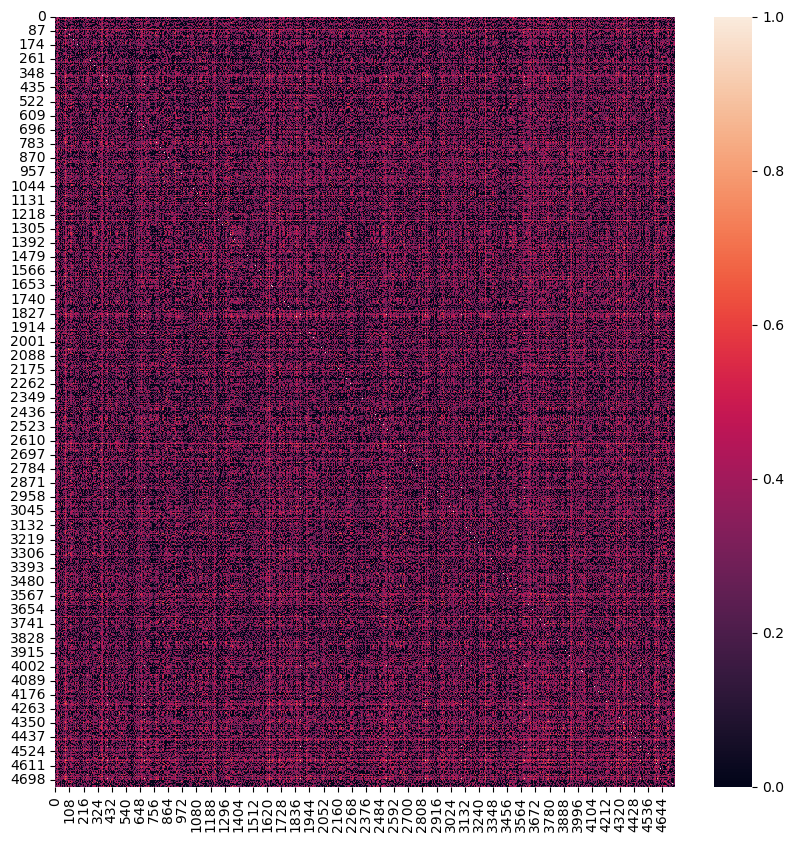

In [26]:
#visualise the similarity matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(similarity_filtered.todense())
plt.show()

### Try saving and loading th model

In [27]:
# save the model
model.save("doc2vec.model")
# load the model
model = Doc2Vec.load("doc2vec.model")
#delete the file
import os
os.remove("doc2vec.model")
# define a text to infer a vector
text = "A book about a wizard boy who goes to a magic boarding school"
#preprocess the text
processed_text = simple_preprocess(text)
#infer the vector
inferred_vector = model.infer_vector(processed_text)
#find the most similar document to the text
td_list=model.dv.most_similar(positive=[inferred_vector], topn=10)
#find the indices of the most similar documents
indices=[int(i[0]) for i in td_list]
#find the most similar books
most_similar_books=book_df.loc[indices]
most_similar_books.head()

book_id                                                url  \
2128     2984    https://www.goodreads.com/book/show/2986865-eon   
834      1127  https://www.goodreads.com/book/show/91478.Summ...   
3860     6683  https://www.goodreads.com/book/show/116563.So_...   
4202     7767  https://www.goodreads.com/book/show/17490.The_...   
807      1089  https://www.goodreads.com/book/show/34507.Equa...   

                           title        isbn  \
2128       Eon: Dragoneye Reborn  0670062278   
834                Summer Knight  0451458923   
3860  So You Want to Be a Wizard  0152047387   
4202    The Faraway Tree Stories  1405201711   
807                  Equal Rites  0060855908   

                                            description  \
2128  Also Known As: Two Pearls of Wisdom, Eon: Rise...   
834   For the 1st printing edition of this ISBN, see...   
3860  Nita Callahan is at the end of her rope becaus...   
4202  The Faraway Tree Stories Omnibus 3-in-1 editio...   
807   The last thing the wizard Drum Billet did, bef...   

                                               imageUrl  \
2128  https://images-na.ssl-images-amazon.com/images...   
834   https://images-na.ssl-images-amazon.com/images...   
3860  https://images-na.ssl-images-amazon.com/images...   
4202  https://images-na.ssl-images-amazon.com/images...   
807   https://images-na.ssl-images-amazon.com/images...   

                                                 genres  \
2128  ['High Fantasy', 'Dragons', 'Mythology', 'Youn...   
834   ['Science Fiction Fantasy', 'Supernatural', 'M...   
3860  ['Middle Grade', 'Science Fiction Fantasy', 'Y...   
4202  ['Middle Grade', 'Childrens Classics', 'Classi...   
807   ['Science Fiction Fantasy', 'Witches', 'Comedy...   

                           publisher               author publishDate  \
2128  Viking Books for Young Readers   ['Alison Goodman']  2008-12-26   
834                  Dutton / Signet      ['Jim Butcher']  2003-05-31   
3860     HMH Books for Young Readers      ['Diane Duane']  2003-07-01   
4202                    Egmont Books      ['Enid Blyton']  2002-01-01   
807                 Harper Perennial  ['Terry Pratchett']  2005-09-13   

      goodreads_book_id language  \
2128            2986865  English   
834               91478  English   
3860             116563  English   
4202              17490  English   
807               34507  English   

                                            genres_list          author_list  
2128  ['High Fantasy', 'Dragons', 'Mythology', 'Youn...   ['Alison Goodman']  
834   ['Science Fiction Fantasy', 'Supernatural', 'M...      ['Jim Butcher']  
3860  ['Middle Grade', 'Science Fiction Fantasy', 'Y...      ['Diane Duane']  
4202  ['Middle Grade', 'Childrens Classics', 'Classi...      ['Enid Blyton']  
807   ['Science Fiction Fantasy', 'Witches', 'Comedy...  ['Terry Pratchett']